# TELCO Churn Analysis

**Dataset information:** Sample data set for customers that left TELCO services in a one-month period

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the Telco dataset
telco_base_data = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**The above table shows the top 5 rows of the dataset.**

In [3]:
#Shape of the dataset
telco_base_data.shape

(7043, 21)

In [4]:
#Data types contained in the dataset
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#Column names in the dataset
telco_base_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#Checking the descriptive statistics of numerical variables in the dataset and transposing it for clearer visualisation
telco_base_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


**Senior Citizen is a categorical column which is why it has either a 0 or 1 value i.e., Boolean.**\

75% of the customers have a **Tenure** less than 55 months with TELCO.

Average **Monthy Charges** are USD 64.76 wheras only 25% of the customers pay more than US 89.85.

**Columns where numerical data can be inferred from should be converted from object data type to int or float data type for better descriptive statistics.**

# Performing EDA on the Dataset

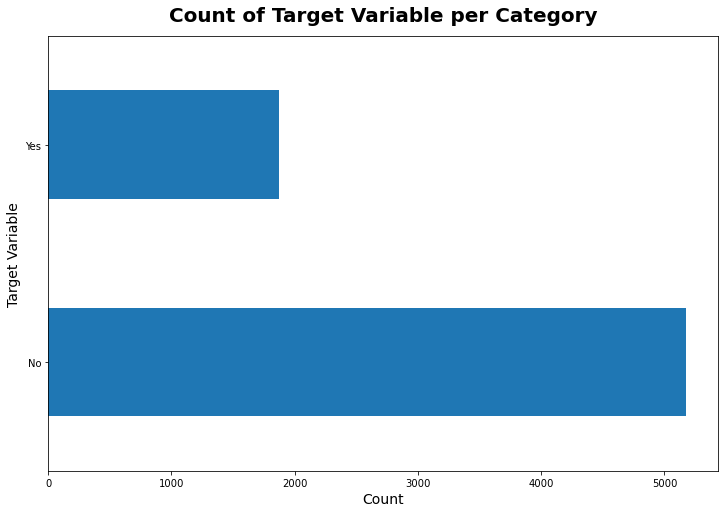

In [7]:
#Plotting a bar chart to visualise present customer churn
telco_base_data['Churn'].value_counts().plot(kind = 'barh', figsize = (12, 8))
plt.title('Count of Target Variable per Category', y = 1.02, fontsize = 20, fontweight = "bold")
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Target Variable', fontsize = 14)
plt.show()

In [8]:
#Percentage calculation of customer churn
telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

* The data has a churn ratio of 73:27 which indicates high imbalance
* The data will be analysed with other features while taking separate target values

In [9]:
telco_base_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
#Summarising the columns of the dataset
telco_base_data.info(verbose = True, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**From the above results, it can be inferred that there are no missing values in the dataset.**

# Creating a copy of the base data

In [11]:
telco_data = telco_base_data.copy()
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
telco_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors = 'coerce')
telco_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
#Checking for null values
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**It can be observed that after converting to numeric data, the TotalCharges column has 11 missing values whereas there were no missing values while it was of object data type.**

In [15]:
#Dropping the missing values from TotalCharges in the dataset
telco_data.dropna(how = 'any', inplace = True)

#Checking for null values
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
#Printing the maximum tenure value
print('Maximum tenure in the dataset: {}'.format(telco_data['tenure'].max()))

Maximum tenure in the dataset: 72


In [17]:
#Categorising customers based on their tenure with TELCO by creating bins
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data['tenure'], range(1, 80, 12), right = False, labels = labels)

In [18]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [19]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

In [20]:
#Dropping the columns customerID and tenure as they are not required
telco_data.drop(columns = ['customerID', 'tenure'], axis = 1, inplace = True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration

## Univariate Analysis

**1. Plot of individual predictors by churn**

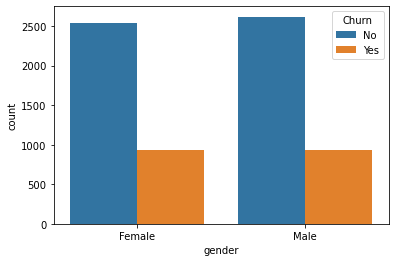

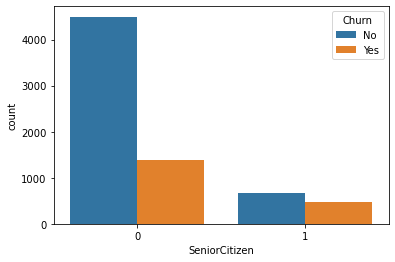

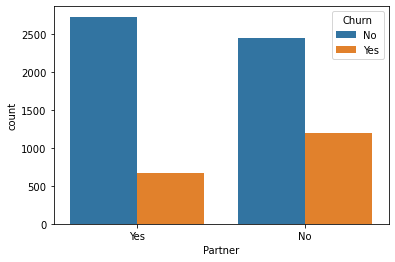

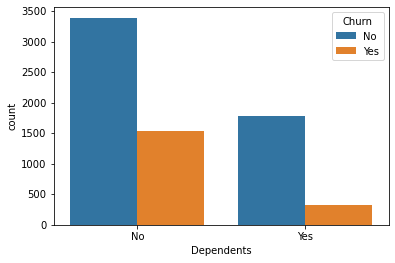

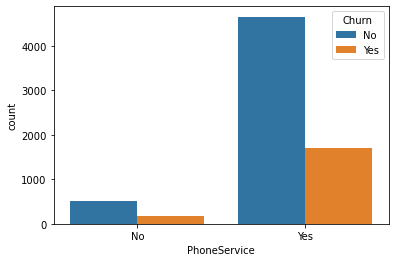

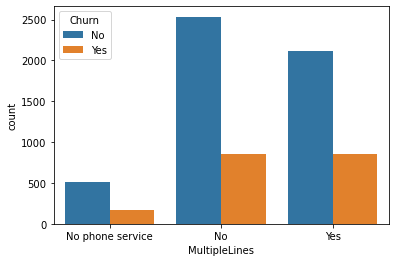

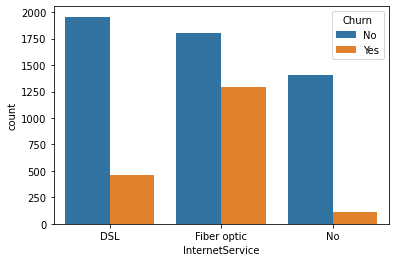

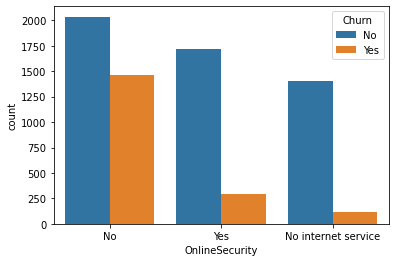

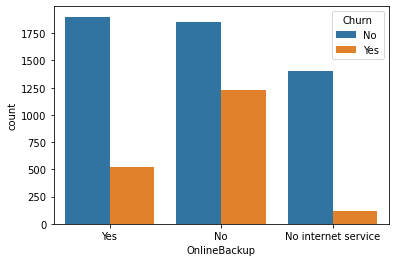

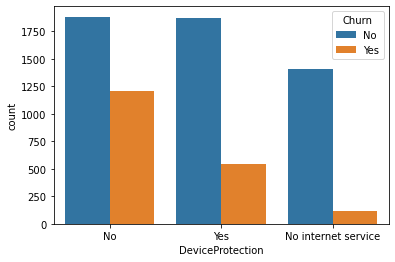

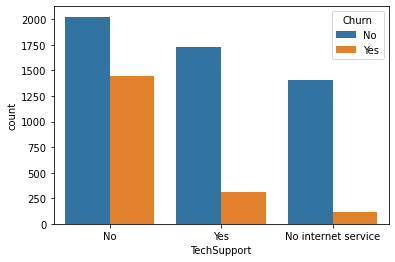

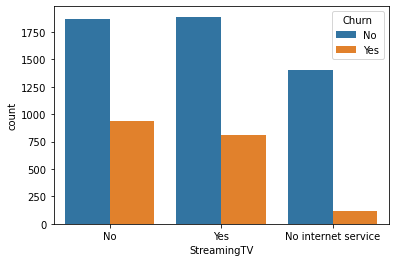

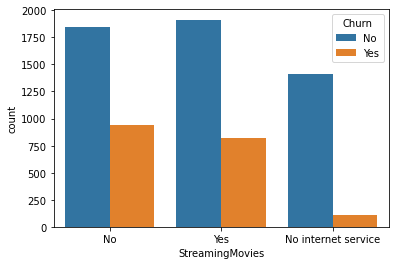

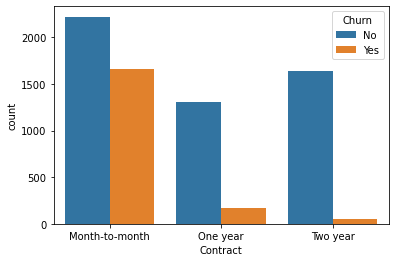

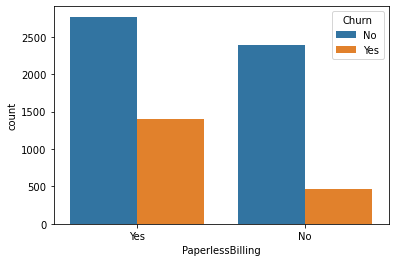

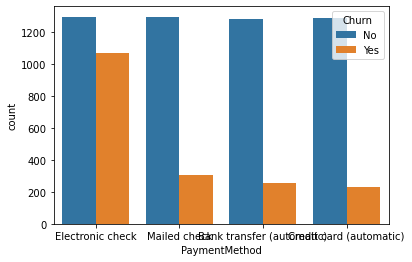

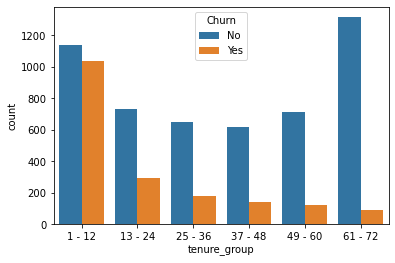

In [21]:
for i, predictor in enumerate(telco_data.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = telco_data, x = predictor, hue = 'Churn')

* **Gender:** The ratios are very similar for churn, hence it is not an important standalone feature for prediction, but could be useful if/when combined with other features.
* **Senior Citizen [0 (Not senior) and 1 (Senior)]:** Ratio of senior citizen churning is around **40%** which is higher than the original churning rate of **27%**. **This can be considered as an important feature for prediction.**
* **Partner:** Churning rate is higher for customers with partner(s) as compared to no partner(s) i.e., around **35%** which is higher than the original churning rate of **27%**. **This can be considered as an important feature for prediction.**
* **Dependents:** From the above graphs, it can be inferred that Partners and Dependents are negatively correlated. Customers with no dependents have a high churning rate i.e., **30%**, which is more than the original churning rate of **27%**. **Can be considered as an important feature for prediction.**
* **PhoneService:** People with phone service are more likely to churn.
* **PaymentMethod:** Customers using **electronic check** as a payment method are the highest churners in this category.


Similarly, other insights will be drawn from the above graphs to help identify the best features for creating a prediction model.

**Converting Churn datatype to numeric since they only contain Yes and No values**

In [22]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes', 1, 0)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**Converting categorical variables to dummy variables for One-Hot Encoding**

In [23]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [24]:
telco_data_dummies.head().shape

(5, 51)

## Plotting the relationship between MonthyCharges and TotalCharges

<Figure size 1440x720 with 0 Axes>

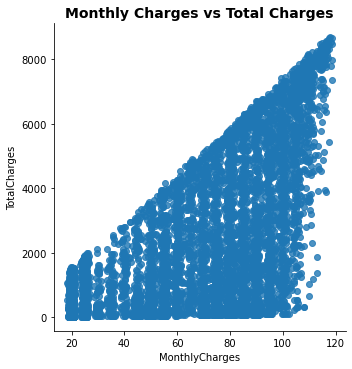

In [28]:
plt.figure(figsize = (20, 10))
sns.lmplot(data = telco_data_dummies, x = 'MonthlyCharges', y = 'TotalCharges', fit_reg = False)
plt.title('Monthly Charges vs Total Charges', fontsize = 14, fontweight = 'bold')
plt.show()

**It can be inferred that as MonthlyCharges increase, the TotalCharges increases as well.** - as expected

## Churn by MonthlyCharges and TotalCharges

Text(0.5, 1.0, 'Monthly Charges by Churn')

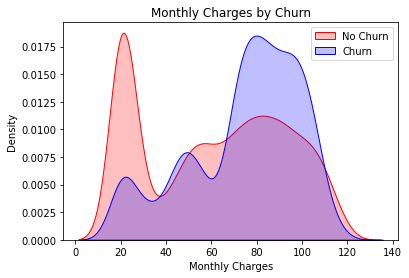

In [29]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'] == 0)], 
                  color = 'Red', shade = True)

Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'] == 1)], 
                  ax = Mth, color = 'Blue', shade = True)

Mth.legend(['No Churn', 'Churn'], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')

**From the above visualisation, it can be inferred that the Churn rate is higher when the monthly prices are high.**

Text(0.5, 1.0, 'Total Charges by Churn')

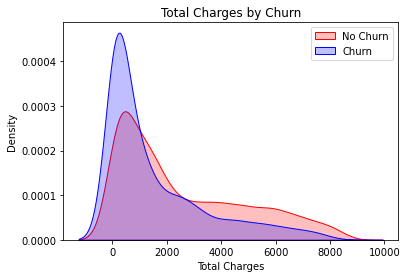

In [31]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn'] == 0)], 
                  color = 'Red', shade = True)

Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn'] == 1)], 
                  ax = Tot, color = 'Blue', shade = True)

Tot.legend(['No Churn', 'Churn'], loc = 'upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges by Churn')

**On the contrary, the churn rate is significantly lower when TotalCharges is high.**

However, on combining insights from 3 parameters i.e., Tenure, MonthlyCharges and TotalCharges, then it can be inferred that:
* High MonthlyCharge * Low Tenure = Low TotalCharges -> Which is linked to **High Churn**

## Building a Correlation of all Predictors with Churn

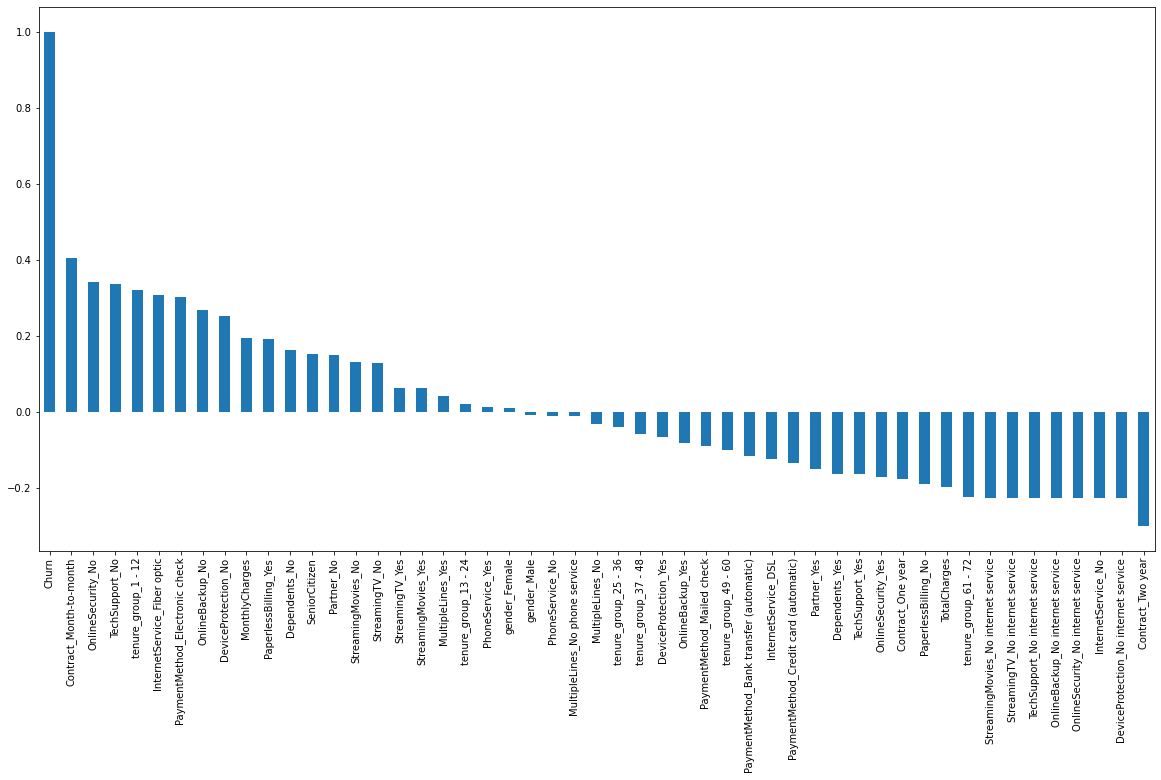

In [35]:
plt.figure(figsize = (20, 10))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

*Meaningful Insights from the above Correlation:*


**High Churn is linked to:**
* Month-to-Month Contracts
* No Online Security
* No Tech Support
* Low tenure i.e, 1 - 12 months (first year of subscription)
* Fibre-Optics Internet
* Electronic Check Payment Method
* No Online Backup

**Low Churn is linked to:**
* Long Term Contracts
* Subscriptions without Internet Service
* Tenure of 5+ years

**Factors that have almost no impact on customer churn:**
* Gender
* Availability of Phone Service
* A number of multiple lines

## Heatmap to verify the same

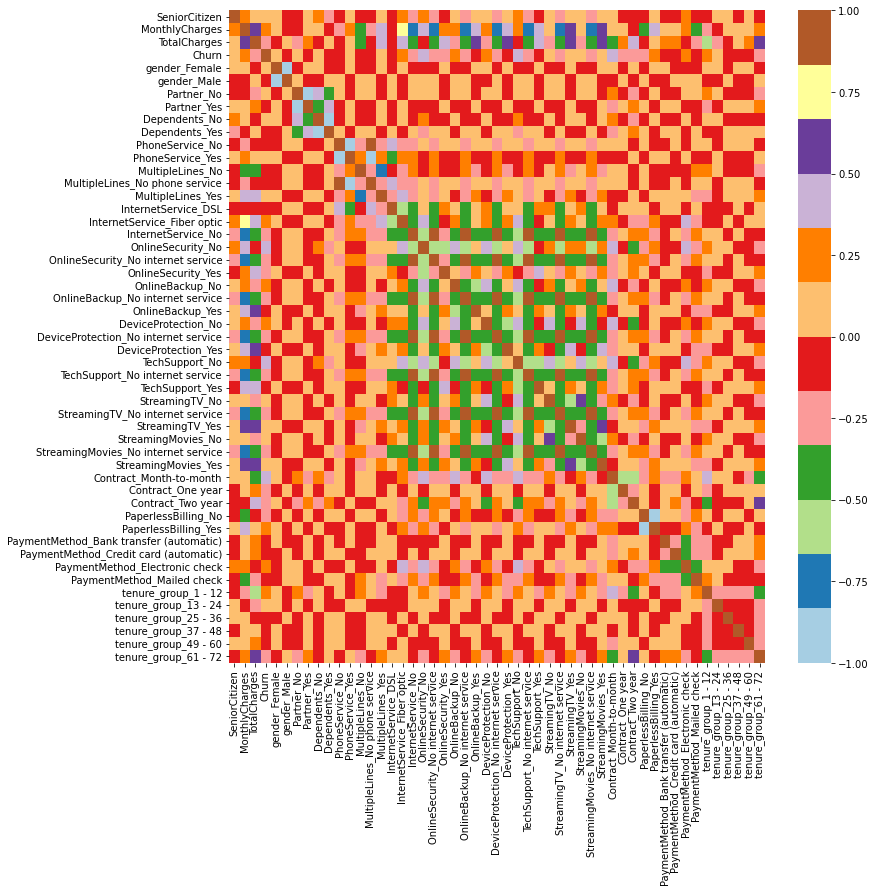

In [37]:
plt.figure(figsize = (12, 12))
sns.heatmap(telco_data_dummies.corr(), cmap = 'Paired')
plt.show()

## Bivariate Analysis

In [38]:
new_df_1_target_0 = telco_data.loc[telco_data['Churn'] == 0]
new_df_1_target_1 = telco_data.loc[telco_data['Churn'] == 1]

In [39]:
new_df_1_target_0.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
6,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,13 - 24
7,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,1 - 12


In [40]:
new_df_1_target_1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49 - 60


In [44]:
def uniplot(df, col, title, hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax  = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue, palette = 'bright')
    
    plt.show()

**The uniplot function takes a DataFrame, a column name, a title, and an optional hue (for grouping), and creates a customized count plot. This plot is particularly useful for visualizing the distribution of categorical data.**

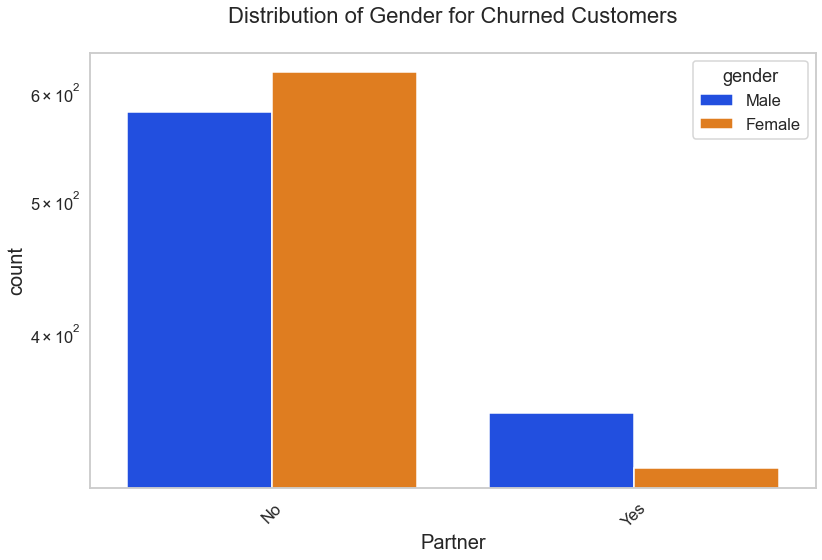

In [46]:
uniplot(new_df_1_target_1, col = 'Partner', title = 'Distribution of Gender for Churned Customers', hue = 'gender')

**It can be inferred that:** 
* **Females** having **No Partner** have a **higher** churn rate as compared to Males
* **Males** having **Partner** have a **higher** churn rate as compared to Females

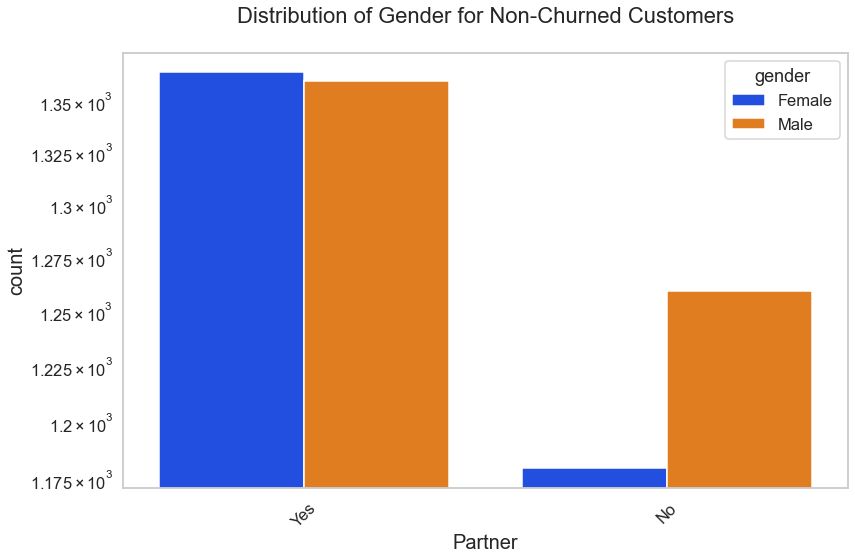

In [47]:
uniplot(new_df_1_target_0, col = 'Partner', title = 'Distribution of Gender for Non-Churned Customers', hue = 'gender')

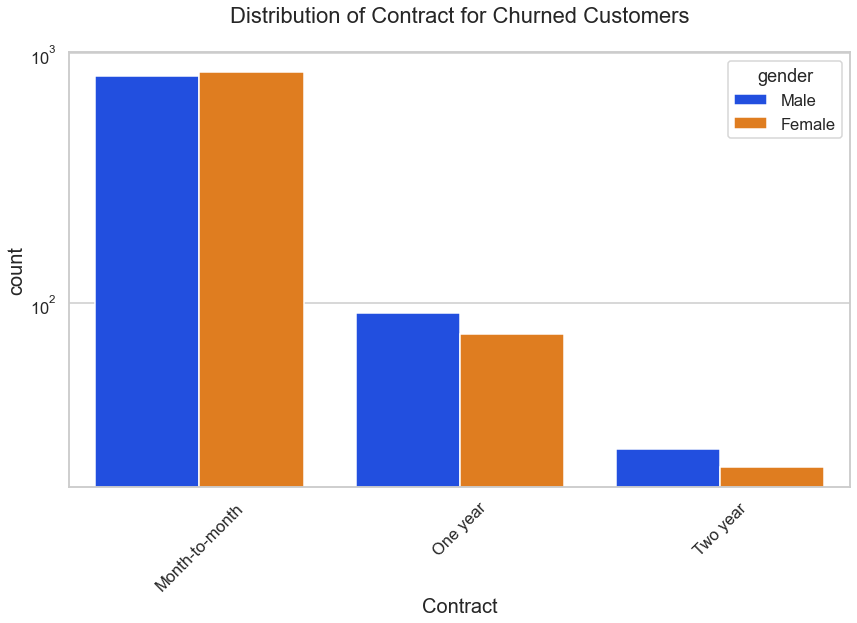

In [48]:
uniplot(new_df_1_target_1, col = 'Contract', title = 'Distribution of Contract for Churned Customers', hue = 'gender')

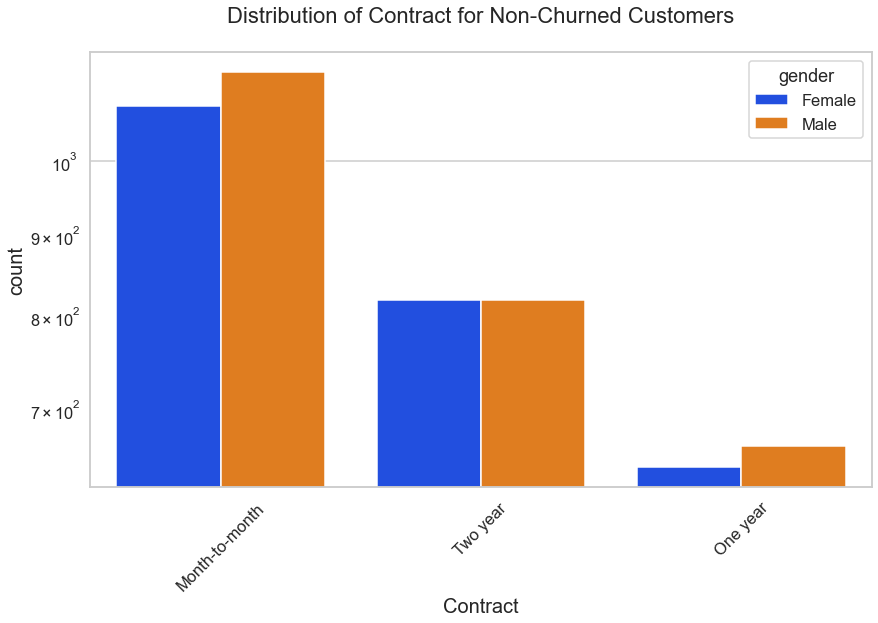

In [49]:
uniplot(new_df_1_target_0, col = 'Contract', title = 'Distribution of Contract for Non-Churned Customers', hue = 'gender')

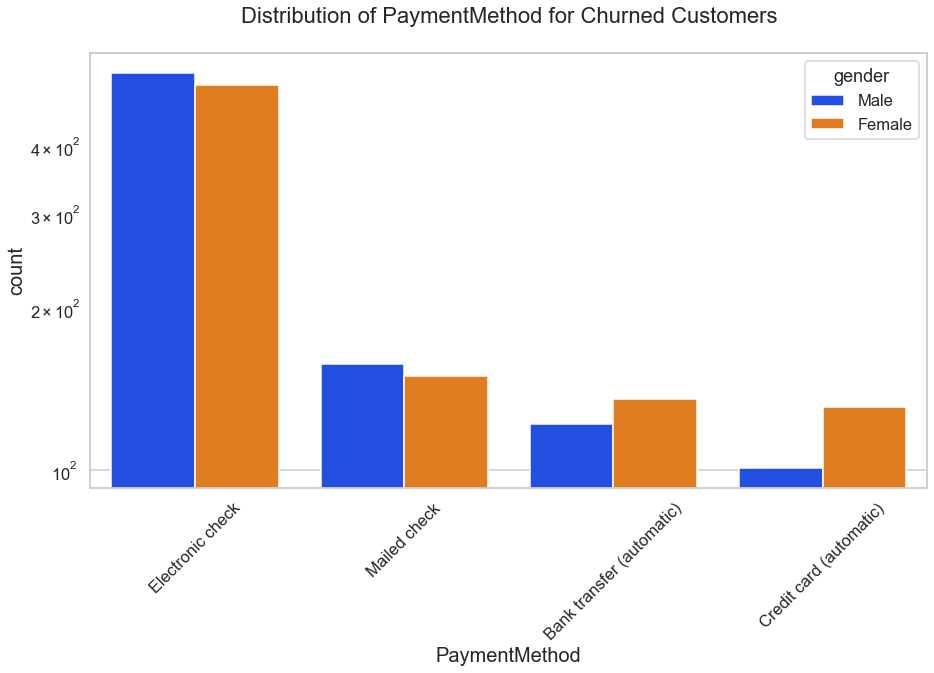

In [51]:
uniplot(new_df_1_target_1, col = 'PaymentMethod', title = 'Distribution of PaymentMethod for Churned Customers', hue = 'gender')

Most Female customers using **Credit Card (automatic)** payment method have a **high churn rate.**

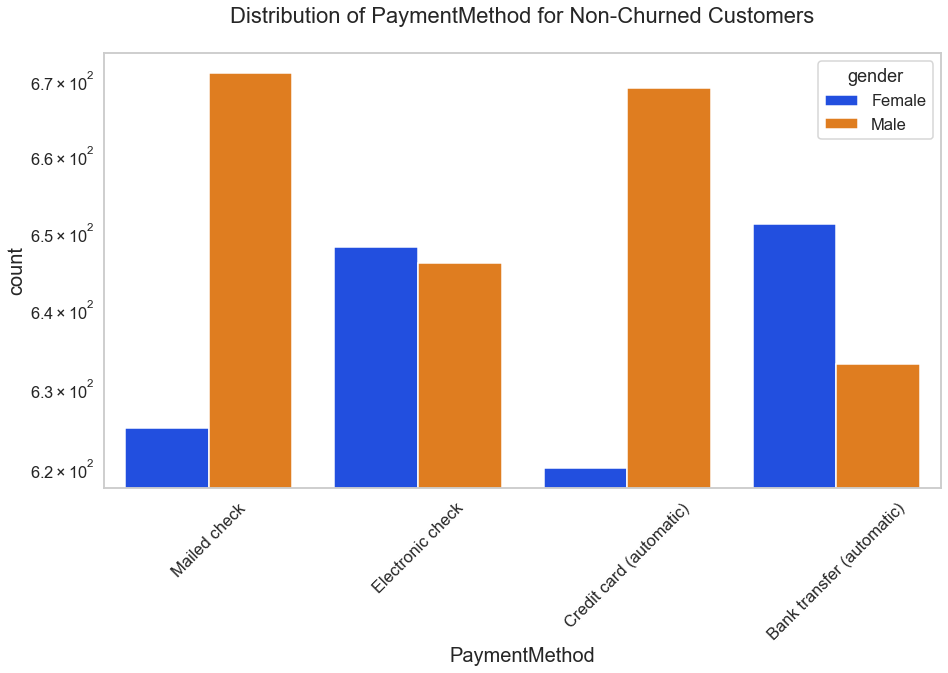

In [52]:
uniplot(new_df_1_target_0, col = 'PaymentMethod', title = 'Distribution of PaymentMethod for Non-Churned Customers', hue = 'gender')

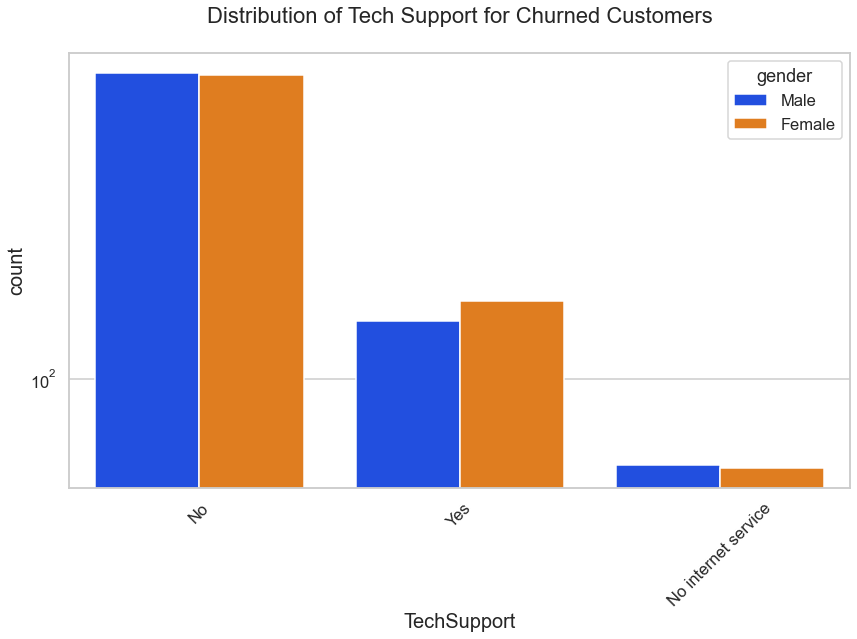

In [53]:
uniplot(new_df_1_target_1, col = 'TechSupport', title = 'Distribution of Tech Support for Churned Customers', hue = 'gender')

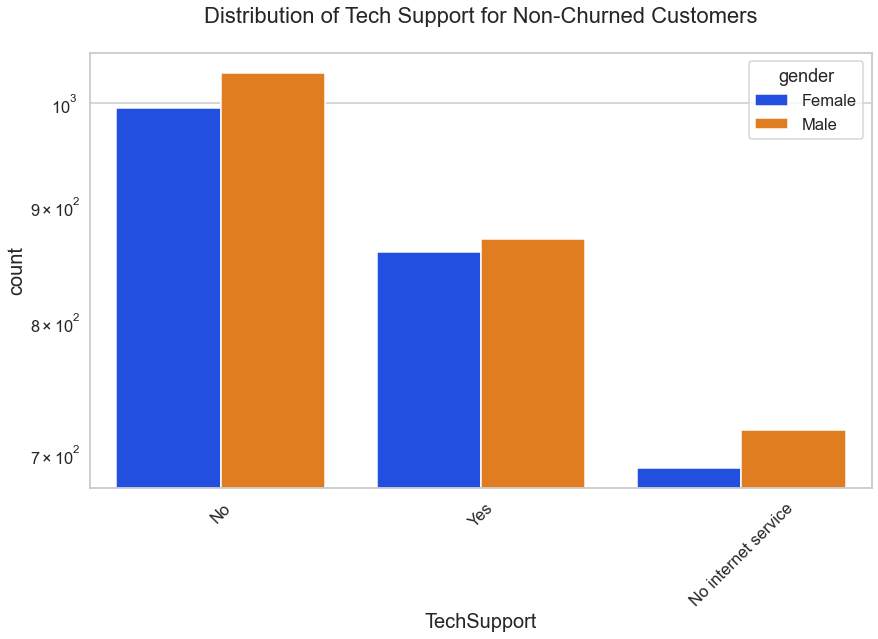

In [54]:
uniplot(new_df_1_target_0, col = 'TechSupport', title = 'Distribution of Tech Support for Non-Churned Customers', hue = 'gender')

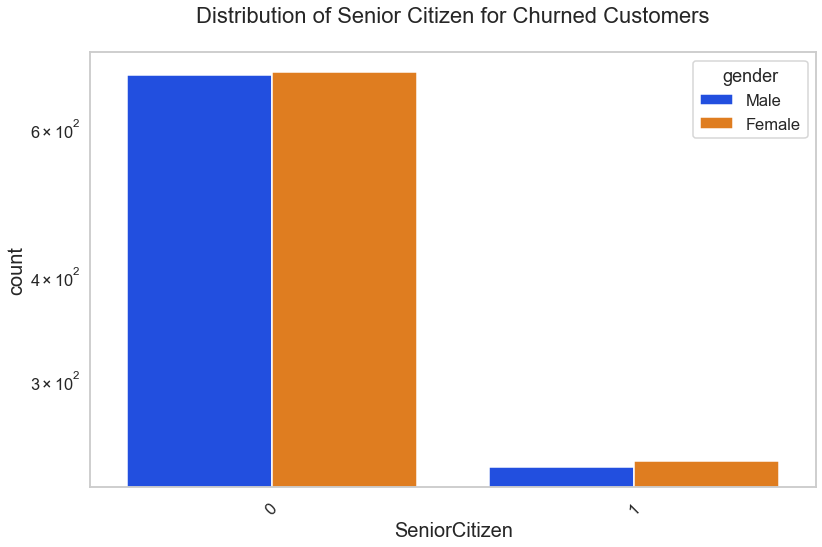

In [55]:
uniplot(new_df_1_target_1, col = 'SeniorCitizen', title = 'Distribution of Senior Citizen for Churned Customers', hue = 'gender')

**The insights from EDA:**

* Electronic check payment method are the highest churners
* Contract Type - Monthly customers are more likely to churn maybe because of no contract terms, as they are not bound to any contractual obligations
* No Online security, No Tech Support category are high churners
* Non-senior Citizens are high churners

In [56]:
#Converting the One-Hot Encoding file to csv
telco_data_dummies.to_csv('tel_churn.csv')